In [58]:
%matplotlib inline
import matplotlib

In [3]:
import numpy as np
import pandas as pd

In [4]:
# check files in directory
from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

Kaggle-HomeDepot.ipynb
attributes.csv
product_descriptions.csv
relevance_instructions.docx
sample_submission.csv
test.csv
train.csv
zipfiles



In [5]:
# load files
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")
attribute_data = pd.read_csv("attributes.csv")
descriptions = pd.read_csv("product_descriptions.csv")


In [6]:
# look at the top 10 rows
print(training_data.tail(10))
print(attribute_data.head(10))
print(descriptions.head(10))

           id  product_uid                                      product_title  \
74057  221434       206621  Crown Bolt M6-32 x 90 mm. Internal Hex Socket ...   
74058  221443       206627           25 in. Stainless Tip-Out Sink Front Tray   
74059  221449       206631  Masonite New Haven Three Quarter Oval Lite Pri...   
74060  221450       206632  Lilly Miller UltraGreen 1 Gal. Vitamin B-1 Pla...   
74061  221455       206637  Schluter Rondec Stainless Steel 3/8 in. x 1 in...   
74062  221457       206638  Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...   
74063  221458       206639  Philips 40-Watt Halogen R20 Flood Light Bulb (...   
74064  221463       206641  Schlage Camelot In-Active Aged Bronze Handlese...   
74065  221471       206648  Plastec 11 in. x 24 in. Rose Garden Wall Decor...   
74066  221473       206650  LICHTENBERG Pool Blue No. 918 Millennial Ryan ...   

                                      search_term  relevance  
74057                               m6 screw 

In [7]:
# merge descriptions
training_data = pd.merge(training_data, descriptions, on="product_uid", how="left")

In [12]:
training_data.head(10)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...


In [14]:
# merge product counts
product_counts = pd.DataFrame(pd.Series(training_data.groupby(["product_uid"]).size(), name="product_count"))
training_data = pd.merge(training_data, product_counts, left_on="product_uid", right_index=True, how="left")

In [21]:
# merge brand names
# ...and change column name by .rename()
brand_names = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})
training_data = pd.merge(training_data, brand_names, on="product_uid", how="left")

In [40]:
# Check if any column has NaN
print(training_data.isnull().sum())
# Which rows are NaN
rowsnan = np.where(training_data['brand_name'].isnull())[0]
training_data.ix[rowsnan].head(10)

id                         0
product_uid                0
product_title              0
search_term                0
relevance                  0
product_description        0
product_count              0
brand_name             17556
dtype: int64


,id,product_uid,product_title,search_term,relevance,product_description,product_count,brand_name
198,660,100109,Shark Navigator Lift-Away Deluxe Bagless Vacuu...,shark cleaner,3.00,A lightweight and steerable Never Loses Suctio...,2,NaN
199,661,100109,Shark Navigator Lift-Away Deluxe Bagless Vacuu...,shark vacuum,3.00,A lightweight and steerable Never Loses Suctio...,2,NaN
219,712,100124,"Champion Power Equipment 3,100 Watt Gasoline P...",inverter generator,3.00,The Champion Power Equipment 16590 gasoline po...,1,NaN
302,969,100160,DEWALT 20-Volt Max Lithium-Ion Cordless Combo ...,dewalt combo kit,3.00,The DEWALT DCK940D2 combo kit is ideal for jus...,1,NaN
881,2808,100490,Milwaukee Metal Hole Saw Kit (15-Piece),$ hole saw,3.00,The Milwaukee Hole Dozer Bi-Metal Hole Saw fea...,1,NaN
1208,3773,100660,EGO 20 in. 56-Volt Lithium-Ion Walk-Behind Ele...,ego batteries,2.00,The performance of gas without the noise mess ...,1,NaN
1219,3800,100666,Eclipse Tools Heat Shrink Tubing - Assorted Co...,heat shrink tubing,3.00,"Used for electrical insulation, bundling, and ...",1,NaN
1241,3878,100678,Trinity EcoStorage 36 in. x 14 in. 3-Tier Bamb...,bakers rack,3.00,Trinity's EcoStorage Bamboo Baker's Rack is a ...,2,NaN
1242,3882,100678,Trinity EcoStorage 36 in. x 14 in. 3-Tier Bamb...,warehouse racks with shelves,2.33,Trinity's EcoStorage Bamboo Baker's Rack is a ...,2,NaN
1419,4371,100750,"GE 4.6 cu. ft. Top Load Washer in White, ENERG...",ge washer,3.00,Your GE ENERGY STAR 4.6 cu. ft. DOE Top Load W...,1,NaN


In [41]:
# fill in NaN
training_data.brand_name.fillna("Unknown", inplace=True)

In [44]:
# structure of the dataframe
print(str(training_data.info()))
# basic statistics of each column
print(str(training_data.describe()))
training_data[:50]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 8 columns):
id                     74067 non-null int64
product_uid            74067 non-null int64
product_title          74067 non-null object
search_term            74067 non-null object
relevance              74067 non-null float64
product_description    74067 non-null object
product_count          74067 non-null int64
brand_name             74067 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 5.1+ MB
None
                  id    product_uid     relevance  product_count
count   74067.000000   74067.000000  74067.000000   74067.000000
mean   112385.709223  142331.911553      2.381634       1.935450
std     64016.573650   30770.774864      0.533984       1.706594
min         2.000000  100001.000000      1.000000       1.000000
25%     57163.500000  115128.500000      2.000000       1.000000
50%    113228.000000  137334.000000      2.330000       1.000000
75%    16827

,id,product_uid,product_title,search_term,relevance,product_description,product_count,brand_name
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,1,BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,2,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,2,Delta
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...,3,Whirlpool
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,1,Lithonia Lighting
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,1,House of Fara


In [45]:
# Looking into the attribute_data
print(attribute_data.name.value_counts())
print(attribute_data.value[attribute_data.name == "Indoor/Outdoor"].value_counts())

MFG Brand Name                          86250
Bullet02                                86248
Bullet03                                86226
Bullet04                                86174
Bullet01                                85940
Product Width (in.)                     61137
Bullet05                                60529
Product Height (in.)                    54698
Product Depth (in.)                     53652
Product Weight (lb.)                    45175
Bullet06                                44901
Color Family                            41508
Bullet07                                34349
Material                                31500
Color/Finish                            28564
Bullet08                                26645
Certifications and Listings             24583
Bullet09                                20567
Assembled Height (in.)                  18299
Assembled Width (in.)                   18263
Assembled Depth (in.)                   18198
Product Length (in.)              

In [53]:
# cut data into categories
# add new column existing data frame
training_data["id_bins"] = pd.cut(training_data.id, 20, labels=False)
# correlation analysis "spearman"
print(training_data.corr(method="spearman"))
training_data.describe()

                     id  product_uid  relevance  product_count   id_bins
id             1.000000     1.000000  -0.126681      -0.484873  0.998746
product_uid    1.000000     1.000000  -0.126681      -0.484873  0.998746
relevance     -0.126681    -0.126681   1.000000      -0.026358 -0.126639
product_count -0.484873    -0.484873  -0.026358       1.000000 -0.484009
id_bins        0.998746     0.998746  -0.126639      -0.484009  1.000000


,id,product_uid,relevance,product_count,id_bins
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634,1.935450,9.648764
std,64016.573650,30770.774864,0.533984,1.706594,5.773127
min,2.000000,100001.000000,1.000000,1.000000,0.000000
25%,57163.500000,115128.500000,2.000000,1.000000,5.000000
50%,113228.000000,137334.000000,2.330000,1.000000,10.000000
75%,168275.500000,166883.500000,3.000000,2.000000,15.000000
max,221473.000000,206650.000000,3.000000,21.000000,19.000000


3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

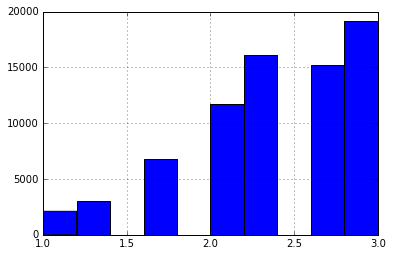

In [68]:
# histogram and table 
# .value_counts() is table for R
import matplotlib
training_data.relevance.hist(bins=10)
training_data.relevance.value_counts()

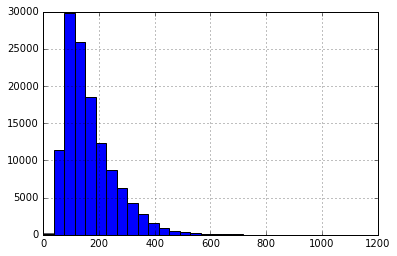

In [67]:
(descriptions.product_description.str.len() / 5).hist(bins=30)

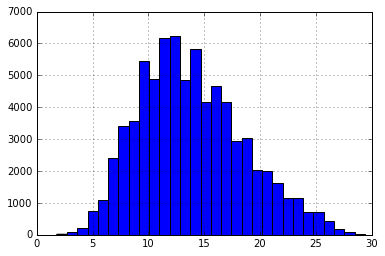

In [69]:
(training_data.product_title.str.len() / 5).hist(bins=30)

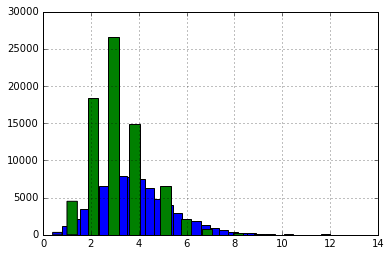

In [73]:
(training_data.search_term.str.len() / 5.).hist(bins=30)
(training_data.search_term.str.count("\\s+") + 1).hist(bins=30)

In [74]:
testing_data.product_uid.value_counts()

101892    52
101280    35
101442    35
101148    34
102456    31
100898    31
102162    30
104691    27
109594    27
101959    26
102235    26
102954    26
101312    26
101024    25
105369    25
102567    25
100941    24
104899    24
100065    24
100526    24
103763    24
101027    23
112119    22
118371    22
102304    22
117268    22
102891    22
100409    22
100885    22
101272    22
          ..
192787     1
182548     1
180501     1
186646     1
174360     1
178458     1
170270     1
168223     1
223520     1
221473     1
143627     1
141576     1
215204     1
147717     1
213157     1
219302     1
217255     1
207016     1
204969     1
211114     1
209067     1
196781     1
125168     1
116980     1
114933     1
119031     1
112890     1
110843     1
162050     1
110474     1
Name: product_uid, dtype: int64

In [75]:
# Distribution Cosine
training_products = training_data.product_uid.value_counts()
testing_products = testing_data.product_uid.value_counts()
training_norm =np.sqrt((training_products ** 2).sum())
testing_norm =np.sqrt((testing_products ** 2).sum())
product_uid_cos = (training_products * testing_products).sum() / (training_norm * testing_norm)
print("Product distribution cosine", product_uid_cos)

('Product distribution cosine', 0.57412736244711404)


In [79]:
import collections

chars = collections.Counter()
for title in training_data.product_title:
    chars.update(title.lower())
total = sum(chars.values())

print("Title char counts")
for c, count in chars.most_common(30):
    print("{}: {:.1f}%".format(c, 100. * count / total))
    
words = collections.Counter()
for title in training_data.search_term:
    words.update(title.lower().split())

total = sum(words.values())
print("Search word counts")
for word, count in words.most_common(200):
    print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))

Title char counts
 : 15.3%
e: 7.9%
i: 6.7%
a: 5.8%
t: 5.8%
n: 5.6%
r: 5.4%
o: 4.9%
l: 4.8%
s: 4.0%
c: 3.2%
d: 2.8%
h: 2.4%
p: 2.1%
u: 2.0%
m: 2.0%
.: 1.9%
g: 1.8%
b: 1.6%
w: 1.5%
f: 1.4%
-: 1.3%
1: 1.0%
k: 1.0%
x: 0.8%
2: 0.8%
y: 0.8%
v: 0.8%
0: 0.7%
4: 0.5%
Search word counts
door: 1.1% (2,679)
light: 0.9% (2,021)
for: 0.8% (1,815)
in: 0.7% (1,665)
inch: 0.6% (1,487)
wall: 0.6% (1,442)
shower: 0.6% (1,429)
with: 0.6% (1,417)
white: 0.6% (1,354)
wood: 0.6% (1,349)
x: 0.6% (1,347)
tile: 0.6% (1,338)
and: 0.5% (1,165)
paint: 0.5% (1,145)
cabinet: 0.5% (1,061)
outdoor: 0.4% (1,052)
water: 0.4% (1,034)
vanity: 0.4% (977)
kitchen: 0.4% (969)
bathroom: 0.4% (963)
doors: 0.4% (960)
gas: 0.4% (925)
led: 0.4% (899)
lights: 0.4% (840)
air: 0.4% (839)
ceiling: 0.3% (805)
sink: 0.3% (801)
2: 0.3% (780)
1/2: 0.3% (772)
faucet: 0.3% (772)
kit: 0.3% (770)
floor: 0.3% (766)
saw: 0.3% (736)
4: 0.3% (733)
fan: 0.3% (729)
black: 0.3% (727)
pipe: 0.3% (725)
steel: 0.3% (710)
window: 0.3% (697)
lighting: 0

In [86]:
print("Indoor/outdoor", training_data.search_term.str.contains("indoor|outdoor|interior|exterior", case=False).value_counts())
print("Contains numbers", training_data.search_term.str.contains("\\d", case=False).value_counts())

('Indoor/outdoor', False    72003
True      2064
Name: search_term, dtype: int64)
('Contains numbers', False    55811
True     18256
Name: search_term, dtype: int64)


In [95]:
for title in training_data.head(10).product_title:
    print title

Simpson Strong-Tie 12-Gauge Angle
Simpson Strong-Tie 12-Gauge Angle
BEHR Premium Textured DeckOver 1-gal. #SC-141 Tugboat Wood and Concrete Coating
Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)
Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)
Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking
Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking
Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking
Lithonia Lighting Quantum 2-Light Black LED Emergency Fixture Unit
House of Fara 3/4 in. x 3 in. x 8 ft. MDF Fluted Casing


In [99]:
# "\n" means print on newline
# what terms are in attributes
print("\n" + "Color Family")
def summarize_values(name, values):
    values.fillna("", inplace=True)
    counts = collections.Counter()
    for value in values:
        counts[value.lower()] += 1
        
    total = sum(counts.values())
    print("{} counts ({:,} values)".format(name, total))
    for word, count in counts.most_common(20):
        print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))

for attribute_name in ["Color Family", "Color/Finish", "Material", "MFG Brand Name", "Indoor/Outdoor", "Commercial / Residential"]:
    summarize_values("\n" + attribute_name, attribute_data[attribute_data.name == attribute_name].value)
    


Color Family

Color Family counts (41,508 values)
white: 15.8% (6,546)
black: 7.5% (3,115)
brown: 5.6% (2,339)
gray: 4.6% (1,892)
whites: 4.4% (1,829)
chrome: 3.9% (1,616)
browns / tans: 3.5% (1,463)
red: 3.0% (1,239)
blacks: 3.0% (1,237)
bronze: 2.8% (1,151)
metallics: 2.6% (1,078)
nickel: 2.5% (1,028)
beige: 2.3% (950)
grays: 2.3% (939)
blue: 2.1% (891)
silver: 2.1% (871)
stainless steel: 2.0% (824)
beige / cream: 1.9% (788)
greens: 1.7% (713)
multi: 1.6% (669)

Color/Finish counts (28,564 values)
white: 14.4% (4,115)
black: 5.7% (1,628)
stainless steel: 3.7% (1,065)
chrome: 3.5% (995)
gray: 1.7% (482)
brushed nickel: 1.7% (473)
oil rubbed bronze: 1.3% (375)
polished chrome: 1.3% (370)
brown: 1.1% (328)
primed white: 1.1% (324)
clear: 1.1% (316)
red: 0.9% (251)
blue: 0.8% (218)
satin nickel: 0.7% (213)
beige: 0.7% (210)
silver: 0.7% (198)
biscuit: 0.7% (196)
almond: 0.7% (187)
stainless: 0.6% (180)
bronze: 0.6% (176)

Material counts (31,500 values)
steel: 13.2% (4,151)
metal: 9.6% 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
